# Credit Card Fraud Detection

### **AIM :** The challenge is to recognize fraudulent credit card transactions so that the customers of credit card companies are not charged for items that they did not purchase. 

### **Main Challenges:**

1. The challenge is to recognize fraudulent credit card transactions so that the customers of credit card companies are not charged for items that they did not purchase.
2. Imbalanced Data i.e most of the transactions (99.8%) are not fraudulent which makes it really hard for detecting the fraudulent ones
3. Data availability as the data is mostly private.
4. Misclassified Data can be another major issue, as not every fraudulent transaction is caught and reported.
5. Adaptive techniques used against the model by the scammers.

### How to tackle these challenges ?

1. The model used must be simple and fast enough to detect the anomaly and classify it as a fraudulent transaction as quickly as possible.
2. For protecting the privacy of the user the dimensionality of the data can be reduced.
3. A more trustworthy source must be taken which double-check the data, at least for training the model.
4. We can make the model simple and interpretable so that when the scammer adapts to it with just some tweaks we can have a new model up and running to deploy.

### Code : Importing the necessary libraries

In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

### Code : Loading the Data

In [2]:
# load the dataset from the csv file using pandas
data = pd.read_csv('../DATA/creditcard.csv')

### Code : Understanding the Data

In [6]:
# Take a look at the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Code : Describing the Data

In [11]:
# shape of the data
print(data.shape)

# statistical parameters' information
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271

### Code : Imbalance in the Data

##### Explaining the data we are dealing with.

In [13]:
# Determine the number of Fraud cases in the dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlier_fraction = len(fraud) / len(valid)
print('Outlier fraction: ',outlier_fraction)
print('Fraud Transactions: ',len(fraud))
print('Valid Transactions: ',len(valid))

Outlier fraction:  0.0017304750013189597
Fraud Transactions:  492
Valid Transactions:  284315


**Insight:**
>Only *0.17%* fraudulent transactions out of all.
This means the data is highly imbalanced.
Let's first apply our model without balancing it and if we don't get good accuracy, then we will find a way to balance it if needed.

### Code : Amount details for Fraudulent transactions

In [15]:
print('Amount details of the fraudulent transactions:')
fraud.Amount.describe()

Amount details of the fraudulent transactions:


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### Code : Amount details for Valid transactions 

In [16]:
print('Amount details of the valid transactions:')
valid.Amount.describe()

Amount details of the valid transactions:


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

**Insight:**
>As we can see from this, the average money transcations in fraudulent ones (*122.211*) is more than the valid ones (*88.29*).
This makes this problem crucial to deal with.

### Code : Plotting the Correlation Matrix

>Correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict which features are more relevant for prediction. 

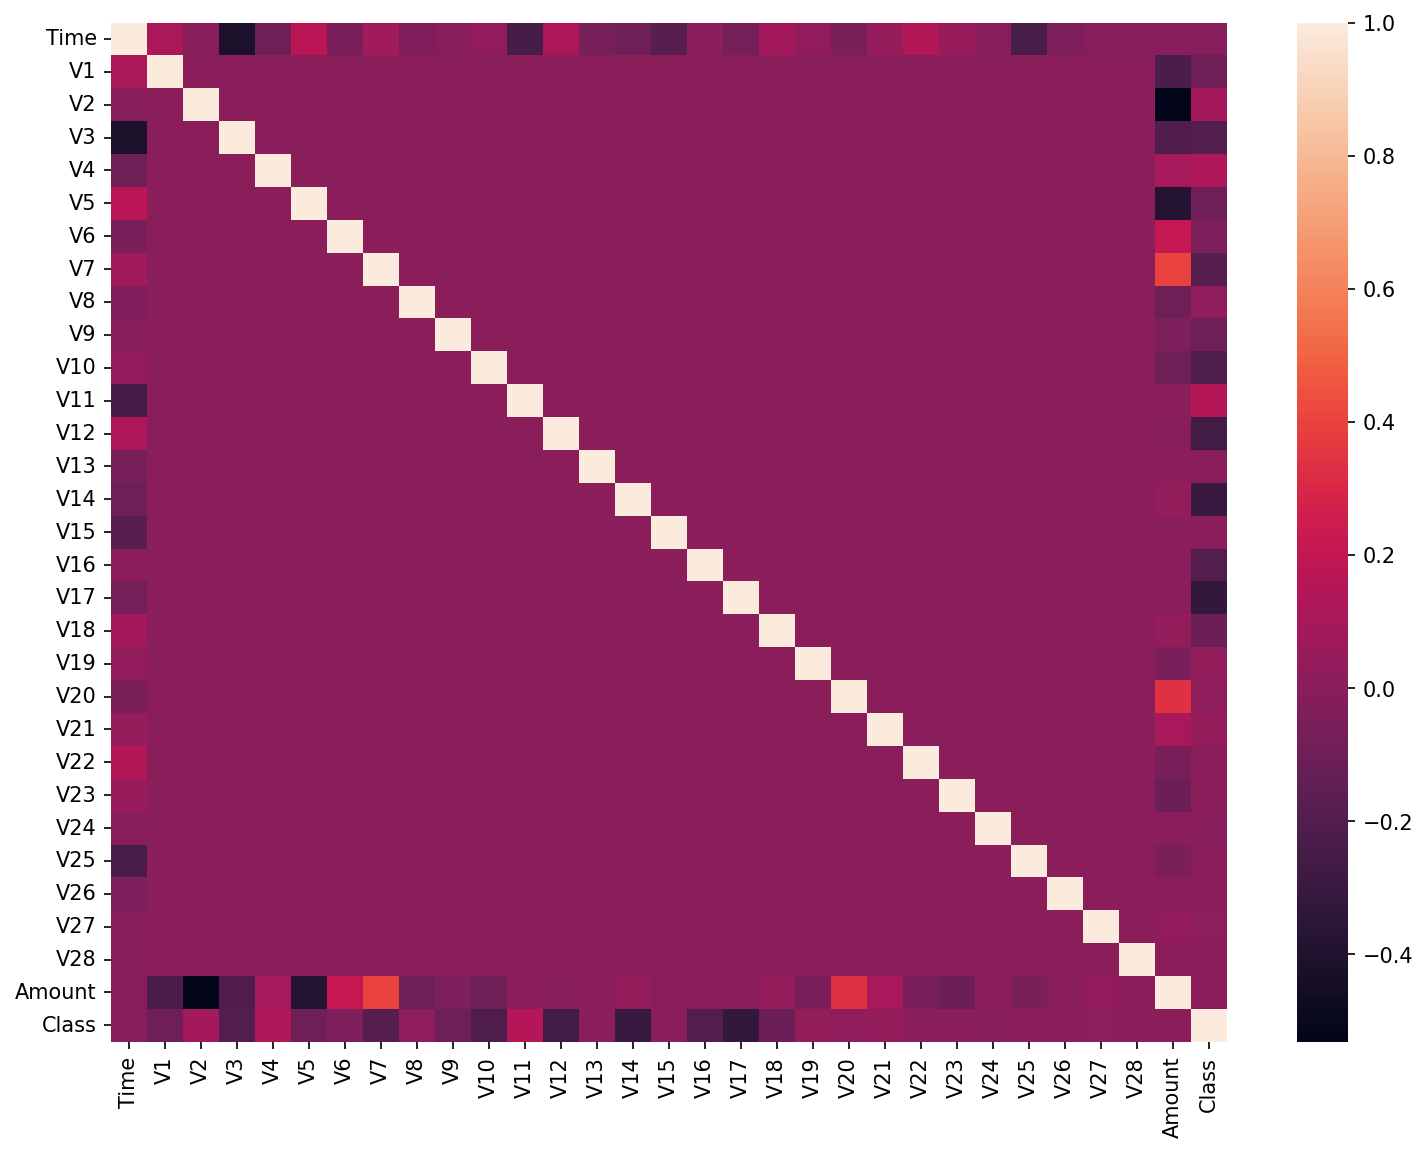

In [18]:
# Correlation Matrix
corr_mat = data.corr()
fig = plt.figure(figsize=(12,9),dpi=150)
sns.heatmap(corr_mat)
plt.show()

**Insight:**
>In the heatmap, we can clearly see that most of the features are not correlated to other features but there are some features that either have a positive or negative correlation with the others. For example, *V2* and *V5* are highly negatively correlated to the feature *Amount*. 
Some positive correlation between *V20* and *Amount* can also be noticed.

### Code : Seperating X and y values
> Dividing the data into input parameters and output values format.

In [19]:
# Dividing the X and y from the dataset
X = data.drop(['Class'],axis=1)
y = data['Class']
print(X.shape)
print(y.shape)

# getting just the values for the sake of processing
# (numpy array with no columns)
X_data = X.values
y_data = y.values

(284807, 30)
(284807,)


### Training and Test data Bifurcation
> We will be dividing the model into two main groups:
> - One for training the model.
> - And another for testing our trained model performance.

In [21]:
# Using Scikit-Learn to split data into training and test sets.
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=101)

### Code : Building a Random Forest Model using scikit learn

In [22]:
# Building the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

# predictions
y_pred = rfc.predict(X_test)

### Code : Building all kinds of Evaluating Parameters

In [23]:
# Evaluating the classifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score,matthews_corrcoef,confusion_matrix

n_outliers = len(fraud)
n_errors   = (y_pred != y_test).sum()

print('The model used is Random Forest Classifier')

acc = accuracy_score(y_test,y_pred)
print('The accuracy is: ',acc)

prec = precision_score(y_test,y_pred)
print('The precision is: ',prec)

rec = recall_score(y_test,y_pred)
print('The recall is: ',rec)

f1 = f1_score(y_test,y_pred)
print('The F1-score is: ',f1)

mcc = matthews_corrcoef(y_test,y_pred)
print('The Matthews correlation coefficient is: ',mcc)

The model used is Random Forest Classifier
The accuracy is:  0.9996137776061234
The precision is:  0.9550561797752809
The recall is:  0.8252427184466019
The F1-score is:  0.8854166666666667
The Matthews correlation coefficient is:  0.8875949570286975


### Code : Visulaizing the Confusion Matrix 

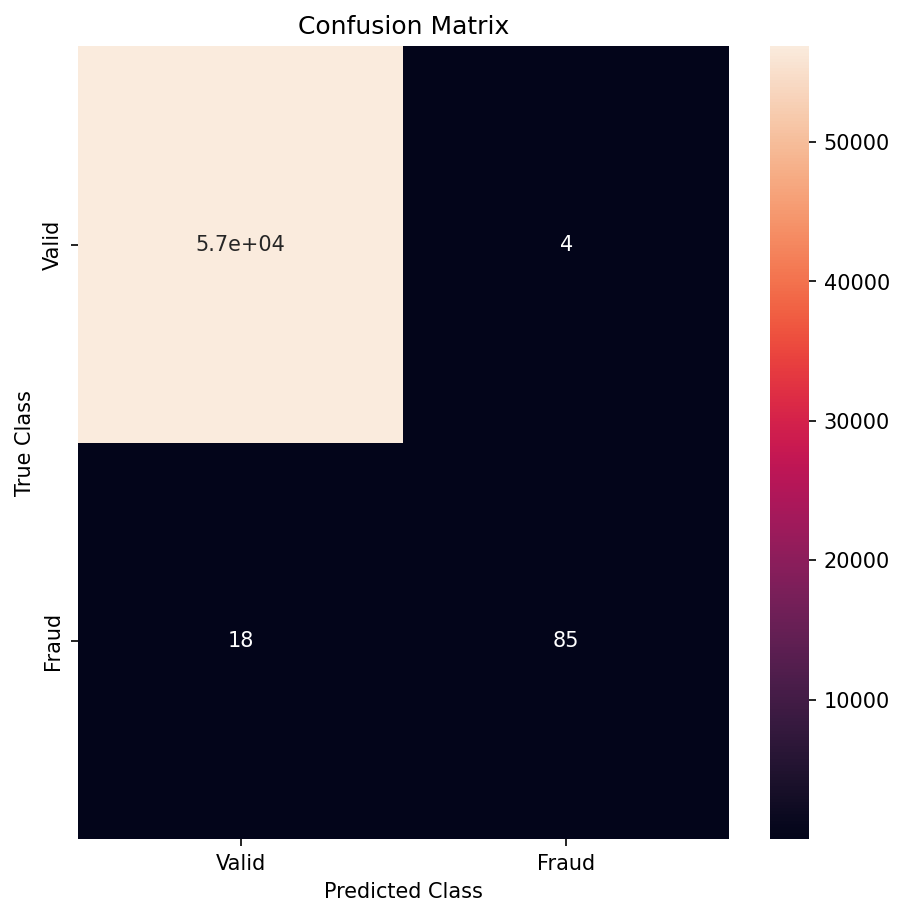

In [26]:
# printing the confusion matrix
labels = ['Valid','Fraud']
conf_matrix = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(7,7),dpi=150)
sns.heatmap(conf_matrix,xticklabels=labels,yticklabels=labels,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

### Conclusion : As evident from the metric scores (especially recall score), our  random forest model is performing really good even with imbalanced data.